# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Loading Data

In [5]:
data = pd.read_csv("D:\\app\\data(1).csv", delimiter=',', encoding='ISO-8859-1')

# Exploratory Data Analysis(EDA)

In [6]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


**Checking data types and missing values**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Statistical summary of numeric features**

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


**Checking for Null Values**

In [9]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
data.shape

(541909, 8)

# Data Preprocessing
**Delete Missing Records**

In [11]:
data.dropna(inplace=True)

**Handling negatives values**

In [12]:
data = data[data['Quantity']>0]

In [13]:
data[data['UnitPrice']<0].shape[0]

0

**Drop the negative values or quantity**

In [14]:
data.drop(data[data['Quantity']<0].index, inplace=True)

# Feature Engineering
*Calculating Total Sales*

In [15]:
data['sales']=data['Quantity']*data['UnitPrice']

In [16]:
new_data=data.groupby('CustomerID')['sales'].sum().reset_index()
new_data

,CustomerID,sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


*Calculating Number of Transactions*

In [17]:
no_trans=data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
no_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


*Calculating Number of Transactions*

In [18]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [19]:
data['Last Transaction']=(data['InvoiceDate'].max()-data['InvoiceDate']).dt.days

In [20]:
It=data.groupby(['CustomerID', 'Country'])['Last Transaction'].max().reset_index()

In [27]:
merge_table=pd.merge(It, no_trans, how='inner', on='CustomerID')
new_df=pd.merge(merge_table, new_data, how='inner',on = 'CustomerID')
print(It)

      CustomerID         Country  Last Transaction
0        12346.0  United Kingdom               325
1        12347.0         Iceland               366
2        12348.0         Finland               357
3        12349.0           Italy                18
4        12350.0          Norway               309
...          ...             ...               ...
4342     18280.0  United Kingdom               277
4343     18281.0  United Kingdom               180
4344     18282.0  United Kingdom               125
4345     18283.0  United Kingdom               336
4346     18287.0  United Kingdom               201

[4347 rows x 3 columns]


In [28]:
print(new_df)

      CustomerID         Country  Last Transaction  InvoiceNo     sales
0        12346.0  United Kingdom               325          1  77183.60
1        12347.0         Iceland               366        182   4310.00
2        12348.0         Finland               357         31   1797.24
3        12349.0           Italy                18         73   1757.55
4        12350.0          Norway               309         17    334.40
...          ...             ...               ...        ...       ...
4342     18280.0  United Kingdom               277         10    180.60
4343     18281.0  United Kingdom               180          7     80.82
4344     18282.0  United Kingdom               125         12    178.05
4345     18283.0  United Kingdom               336        756   2094.88
4346     18287.0  United Kingdom               201         70   1837.28

[4347 rows x 5 columns]


# Removing Outliers
*It includes Identifying and removing outliers from the dataset to improve clustering accuracy.*

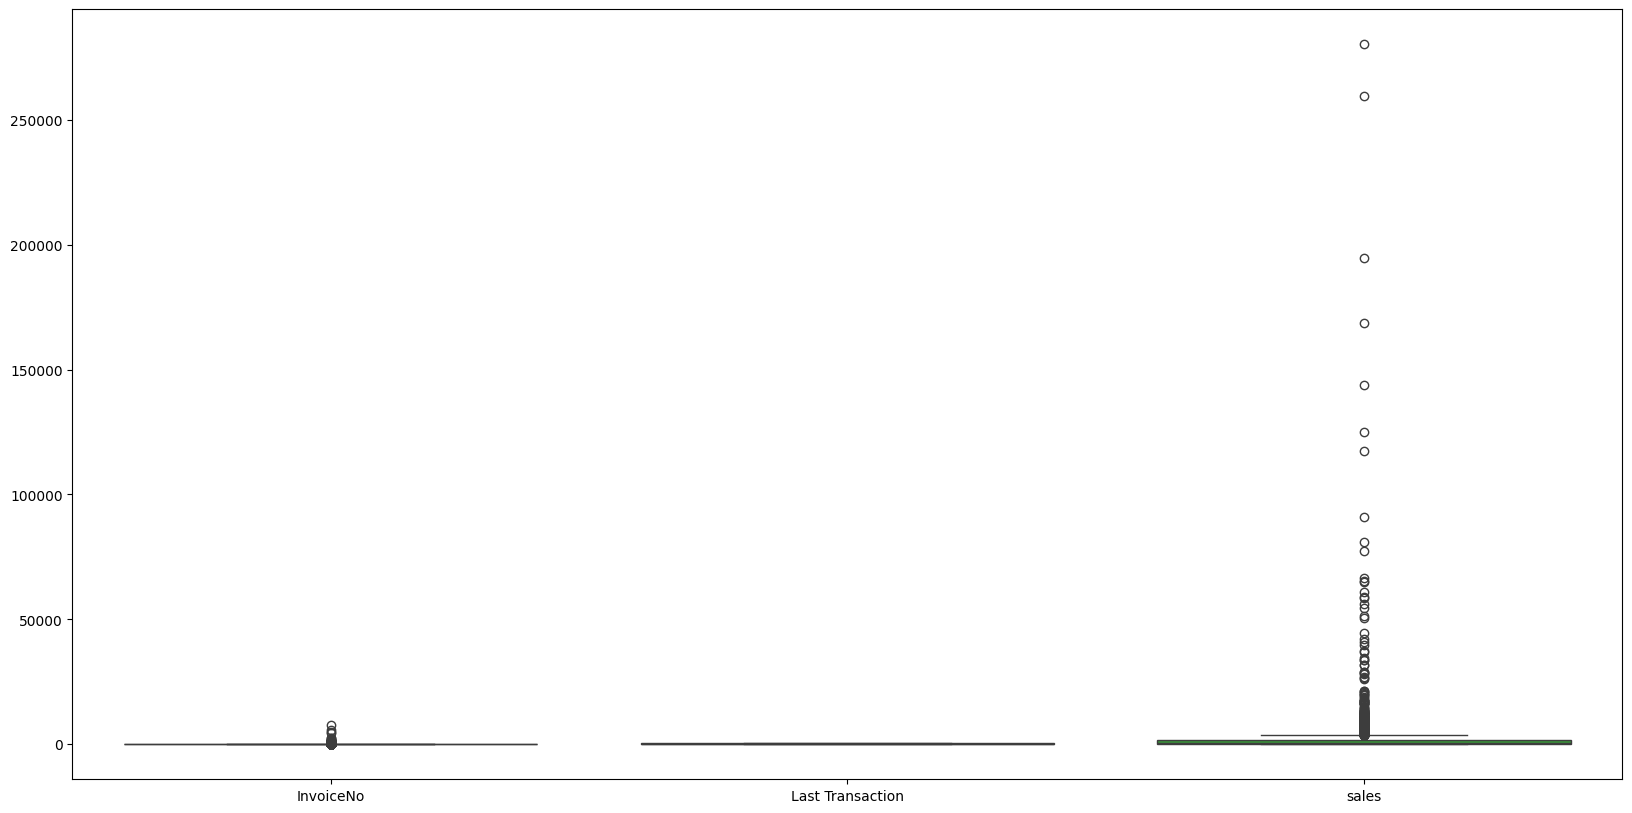

In [31]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df[['InvoiceNo', 'Last Transaction', 'sales']])
plt.show()


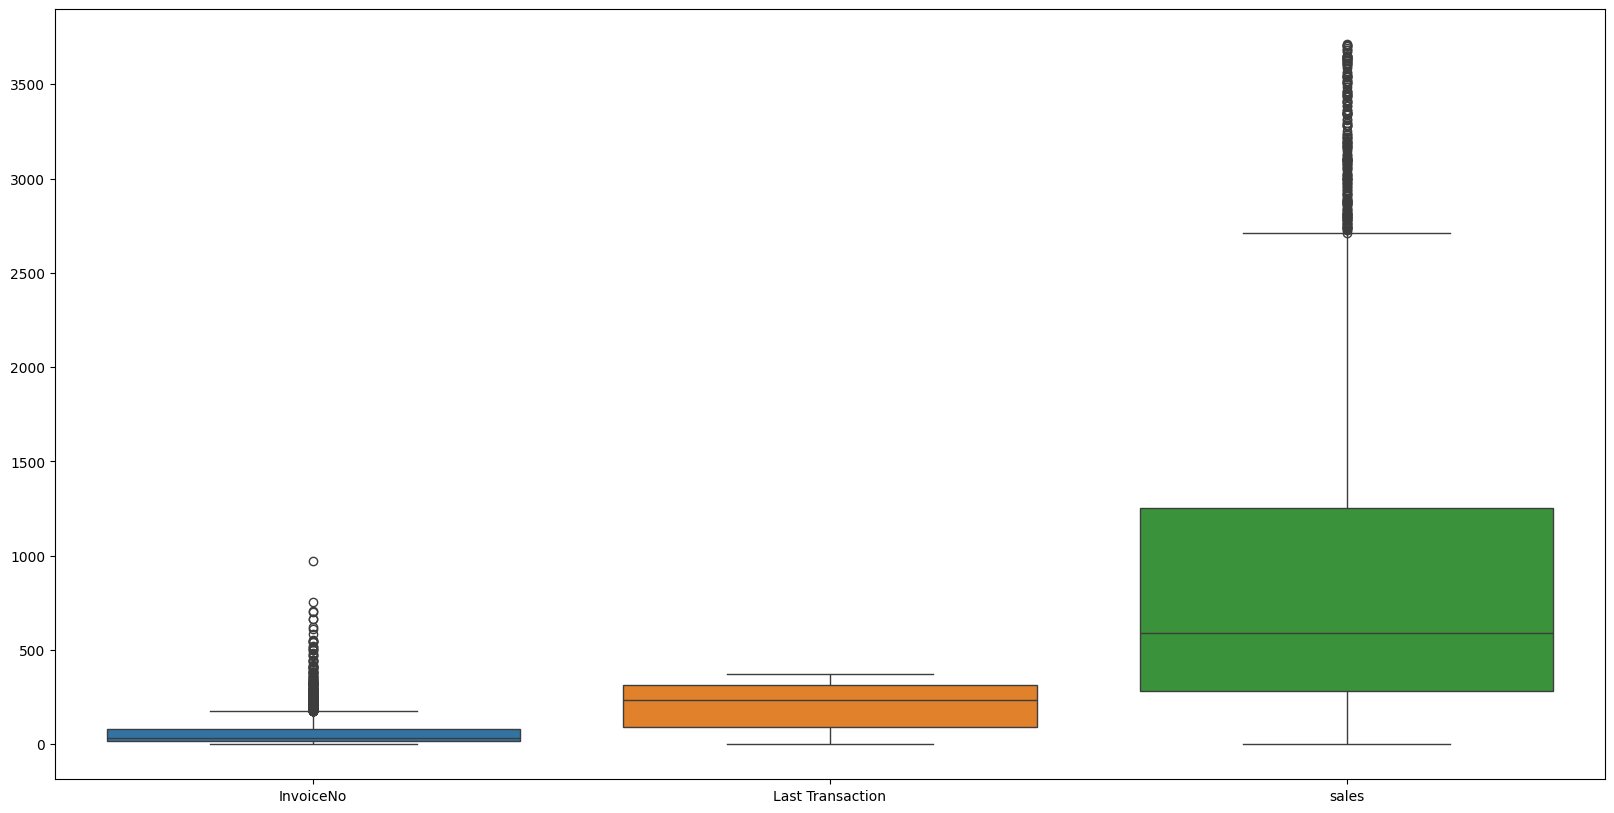

In [32]:
IQR = new_df['sales'].quantile(0.75) - new_df['sales'].quantile(0.25)
lower_limit = new_df['sales'].quantile(0.25) - 1.5 * IQR
upper_limit = new_df['sales'].quantile(0.75) + 1.5 * IQR
new_df_iqr = new_df[(new_df['sales'] < upper_limit) & (new_df['sales'] > lower_limit)]

plt.figure(figsize=(20, 10))
sns.boxplot(data=new_df_iqr[['InvoiceNo', 'Last Transaction', 'sales']])
plt.show()

new_df_iqr.reset_index(drop=True, inplace=True)

# Normalisation
*The MinMaxScaler is applied to scale the selected features between 0 and 1.*
*The scaled data is converted back to a DataFrame and assigned column names.*

In [33]:
from sklearn.preprocessing import MinMaxScaler
new2_df= new_df_iqr[['Last Transaction','InvoiceNo','sales']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = ['Last Transaction','InvoiceNo','sales']
scaled_df['Country'] = new_df_iqr['Country']
scaled_df

,Last Transaction,InvoiceNo,sales,Country
0,0.957105,0.030960,0.484200,Finland
1,0.048257,0.074303,0.473507,Italy
2,0.828418,0.016512,0.090092,Norway
3,0.793566,0.086687,0.675160,Norway
4,0.544236,0.003096,0.023978,Bahrain
...,...,...,...,...
3918,0.742627,0.009288,0.048656,United Kingdom
3919,0.482574,0.006192,0.021774,United Kingdom
3920,0.335121,0.011352,0.047969,United Kingdom
3921,0.900804,0.779154,0.564388,United Kingdom


# Model Selection
**K-Means Algorithms**

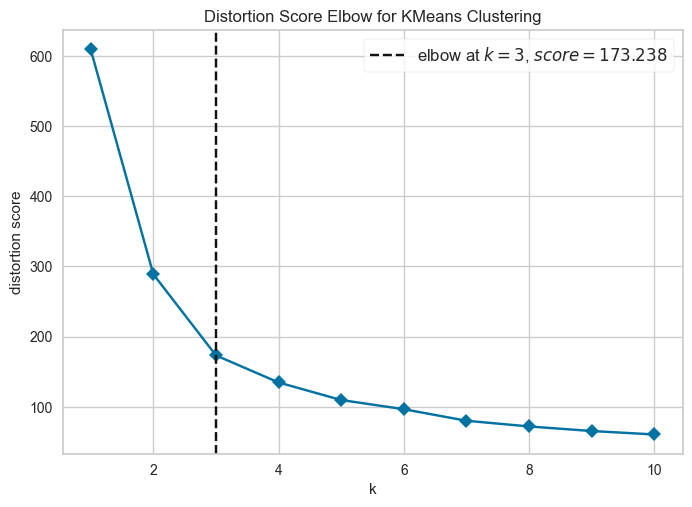

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)
visualizer.show()

# Model Evaluation

**Silhouette Score:** *It measures the compactness of clusters and ranges from -1 to 1, with higher scores indicating better clustering.*


In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, model.labels_, metric='euclidean')
print(score)

0.372147655344793


In [38]:
import pickle

In [40]:
pickle.dump(model, open("KMeansModel.pkl", "wb"))

In [44]:
model_Cluster = pickle.load(open("KMeansModel.pkl", "rb"))

In [45]:
type(model_Cluster)

sklearn.cluster._kmeans.KMeans